In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs


from wordcloud import WordCloud, STOPWORDS

plt.style.use('default')
plt.style.use('dark_background')

In [2]:
reviews = pd.read_csv('airbnb_reviews.csv')

reviews

input.limit  input.listing_id  \
0              1000              3831   
1              1000              3831   
2              1000              3831   
3              1000              3831   
4              1000              3831   
...             ...               ...   
365049         1000          16814382   
365050         1000          16814382   
365051         1000          16814382   
365052         1000          16814382   
365053         1000          16814382   

                                         reviews.comments  reviews.id  \
0       Location was exactly as described and she gave...   547995290   
1       A very nice place in a great location close to...   547040295   
2       This is a great option for value seekers and t...   542528708   
3                          Awesome host, very responsive.   541083598   
4       It was amazing to have so much room ! It was q...   535494450   
...                                                   ...         ...   
365049  Solid place to stay in the Bronx. A 4 minute w...   138612921   
365050  Armando's place was wonderful. It is a big bea...   133603278   
365051  Great place, it was very comfortable, Spacious...   130701478   
365052  Everything was as described and they were VERY...   129199534   
365053  This is my second time lodging at Armando' hou...   128427168   

       reviews.language  reviews.reviewee.deleted reviews.reviewee.first_name  \
0                    en                     False                 LisaRoxanne   
1                    en                     False                 LisaRoxanne   
2                    en                     False                 LisaRoxanne   
3                    en                     False                 LisaRoxanne   
4                    en                     False                 LisaRoxanne   
...                 ...                       ...                         ...   
365049               en                     False                     Armando   
365050               en                     False                     Armando   
365051               en                     False                     Armando   
365052               en                     False                     Armando   
365053               en                     False                     Armando   

       reviews.reviewee.host_name  reviews.reviewee.id  \
0                     LisaRoxanne                 4869   
1                     LisaRoxanne                 4869   
2                     LisaRoxanne                 4869   
3                     LisaRoxanne                 4869   
4                     LisaRoxanne                 4869   
...                           ...                  ...   
365049                    Armando             23878336   
365050                    Armando             23878336   
365051                    Armando             23878336   
365052                    Armando             23878336   
365053                    Armando             23878336   

                             reviews.reviewee.picture_url  ...  \
0       https://a0.muscache.com/im/users/4869/profile_...  ...   
1       https://a0.muscache.com/im/users/4869/profile_...  ...   
2       https://a0.muscache.com/im/users/4869/profile_...  ...   
3       https://a0.muscache.com/im/users/4869/profile_...  ...   
4       https://a0.muscache.com/im/users/4869/profile_...  ...   
...                                                   ...  ...   
365049  https://a0.muscache.com/im/users/23878336/prof...  ...   
365050  https://a0.muscache.com/im/users/23878336/prof...  ...   
365051  https://a0.muscache.com/im/users/23878336/prof...  ...   
365052  https://a0.muscache.com/im/users/23878336/prof...  ...   
365053  https://a0.muscache.com/im/users/23878336/prof...  ...   

       reviews.reviewer.first_name  reviews.reviewer.host_name  \
0                            Allie                       Allie   
1                            Brent         

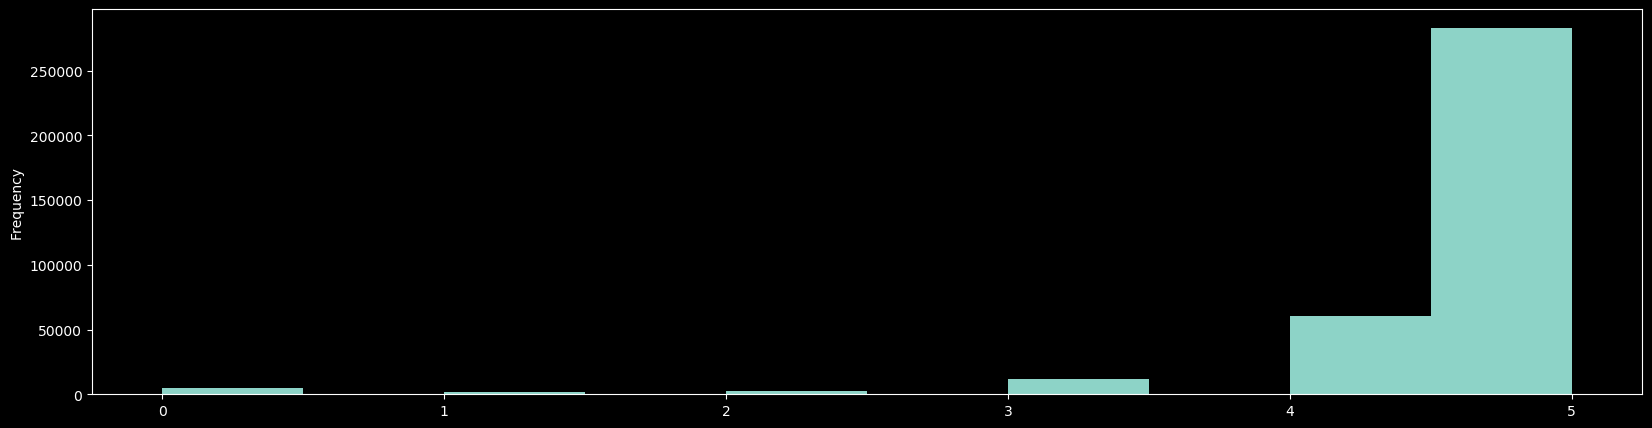

In [7]:
reviews['reviews.rating'].plot(kind='hist', figsize=(20,5))

In [4]:
reviews.loc[reviews['reviews.rating'] == 5]

input.limit  input.listing_id  \
0              1000              3831   
1              1000              3831   
3              1000              3831   
4              1000              3831   
6              1000              3831   
...             ...               ...   
365049         1000          16814382   
365050         1000          16814382   
365051         1000          16814382   
365052         1000          16814382   
365053         1000          16814382   

                                         reviews.comments  reviews.id  \
0       Location was exactly as described and she gave...   547995290   
1       A very nice place in a great location close to...   547040295   
3                          Awesome host, very responsive.   541083598   
4       It was amazing to have so much room ! It was q...   535494450   
6       Loved that we had the entire upper floor. Grea...   520523784   
...                                                   ...         ...   
365049  Solid place to stay in the Bronx. A 4 minute w...   138612921   
365050  Armando's place was wonderful. It is a big bea...   133603278   
365051  Great place, it was very comfortable, Spacious...   130701478   
365052  Everything was as described and they were VERY...   129199534   
365053  This is my second time lodging at Armando' hou...   128427168   

       reviews.language  reviews.reviewee.deleted reviews.reviewee.first_name  \
0                    en                     False                 LisaRoxanne   
1                    en                     False                 LisaRoxanne   
3                    en                     False                 LisaRoxanne   
4                    en                     False                 LisaRoxanne   
6                    en                     False                 LisaRoxanne   
...                 ...                       ...                         ...   
365049               en                     False                     Armando   
365050               en                     False                     Armando   
365051               en                     False                     Armando   
365052               en                     False                     Armando   
365053               en                     False                     Armando   

       reviews.reviewee.host_name  reviews.reviewee.id  \
0                     LisaRoxanne                 4869   
1                     LisaRoxanne                 4869   
3                     LisaRoxanne                 4869   
4                     LisaRoxanne                 4869   
6                     LisaRoxanne                 4869   
...                           ...                  ...   
365049                    Armando             23878336   
365050                    Armando             23878336   
365051                    Armando             23878336   
365052                    Armando             23878336   
365053                    Armando             23878336   

                             reviews.reviewee.picture_url  ...  \
0       https://a0.muscache.com/im/users/4869/profile_...  ...   
1       https://a0.muscache.com/im/users/4869/profile_...  ...   
3       https://a0.muscache.com/im/users/4869/profile_...  ...   
4       https://a0.muscache.com/im/users/4869/profile_...  ...   
6       https://a0.muscache.com/im/users/4869/profile_...  ...   
...                                                   ...  ...   
365049  https://a0.muscache.com/im/users/23878336/prof...  ...   
365050  https://a0.muscache.com/im/users/23878336/prof...  ...   
365051  https://a0.muscache.com/im/users/23878336/prof...  ...   
365052  https://a0.muscache.com/im/users/23878336/prof...  ...   
365053  https://a0.muscache.com/im/users/23878336/prof...  ...   

       reviews.reviewer.first_name  reviews.reviewer.host_name  \
0                            Allie                       Allie   
1                            Brent         

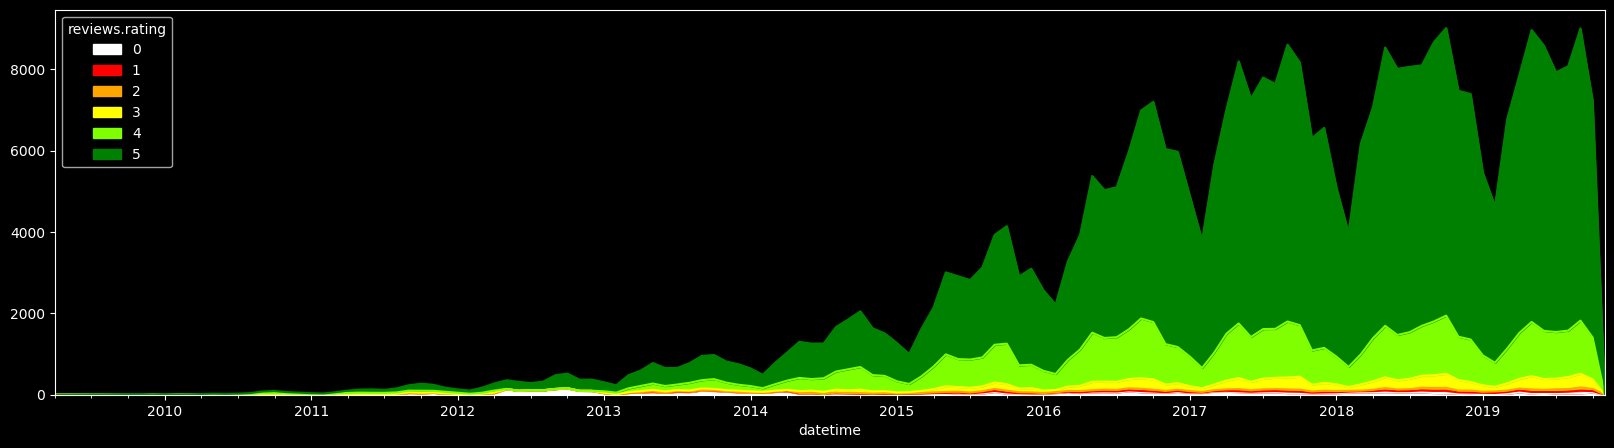

In [8]:
reviews['reviews.localized_date']

reviews['datetime'] = pd.to_datetime(
    reviews['reviews.localized_date'],
)

reviews \
    .groupby('reviews.rating')['datetime'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='area', figsize=(20,5), color=['white', 'red', 'orange', 'yellow', 'chartreuse', 'green'])

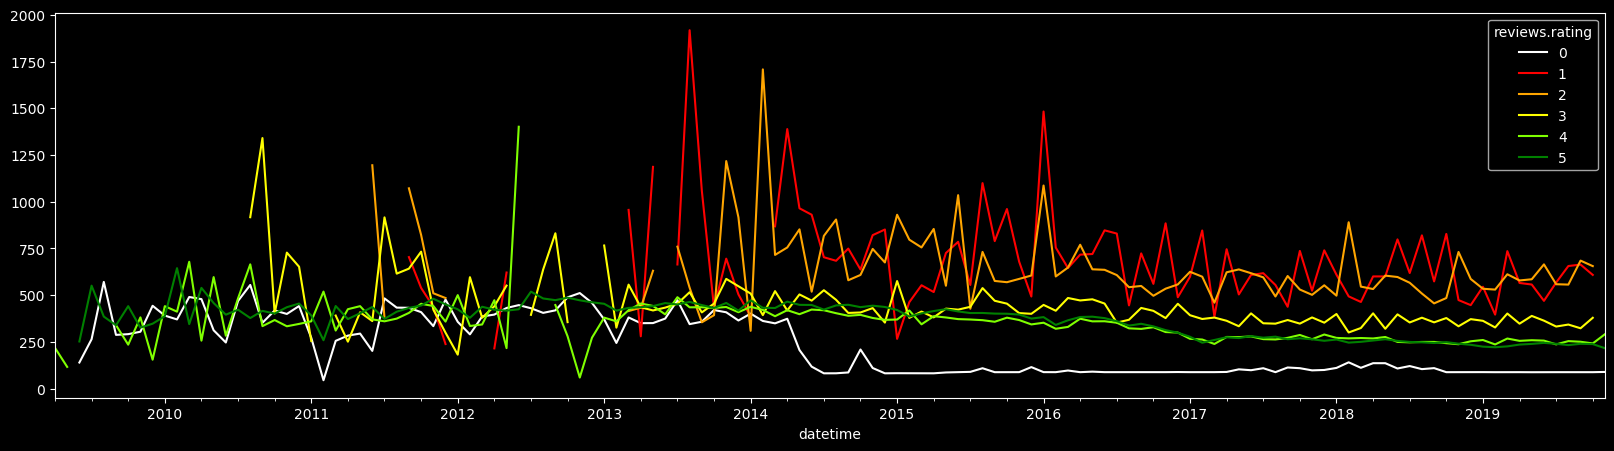

In [9]:
reviews['review_length'] = reviews['reviews.comments'].str.len()

reviews \
    .groupby(['reviews.rating', 'datetime'])['review_length'] \
    .mean() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5), stacked=False, color=['white', 'red', 'orange', 'yellow', 'chartreuse', 'green'])

In [10]:
bad_reviews = reviews.loc[reviews['reviews.rating'] == 1]
good_reviews = reviews.loc[reviews['reviews.rating'] == 5]

In [107]:
bad_reviews_text = bad_reviews['reviews.comments'].str.cat(sep=' ')
good_reviews_text = good_reviews['reviews.comments'].str.cat(sep=' ')

In [108]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap='autumn',
    background_color = 'black',
    stopwords = STOPWORDS).generate(bad_reviews_text)

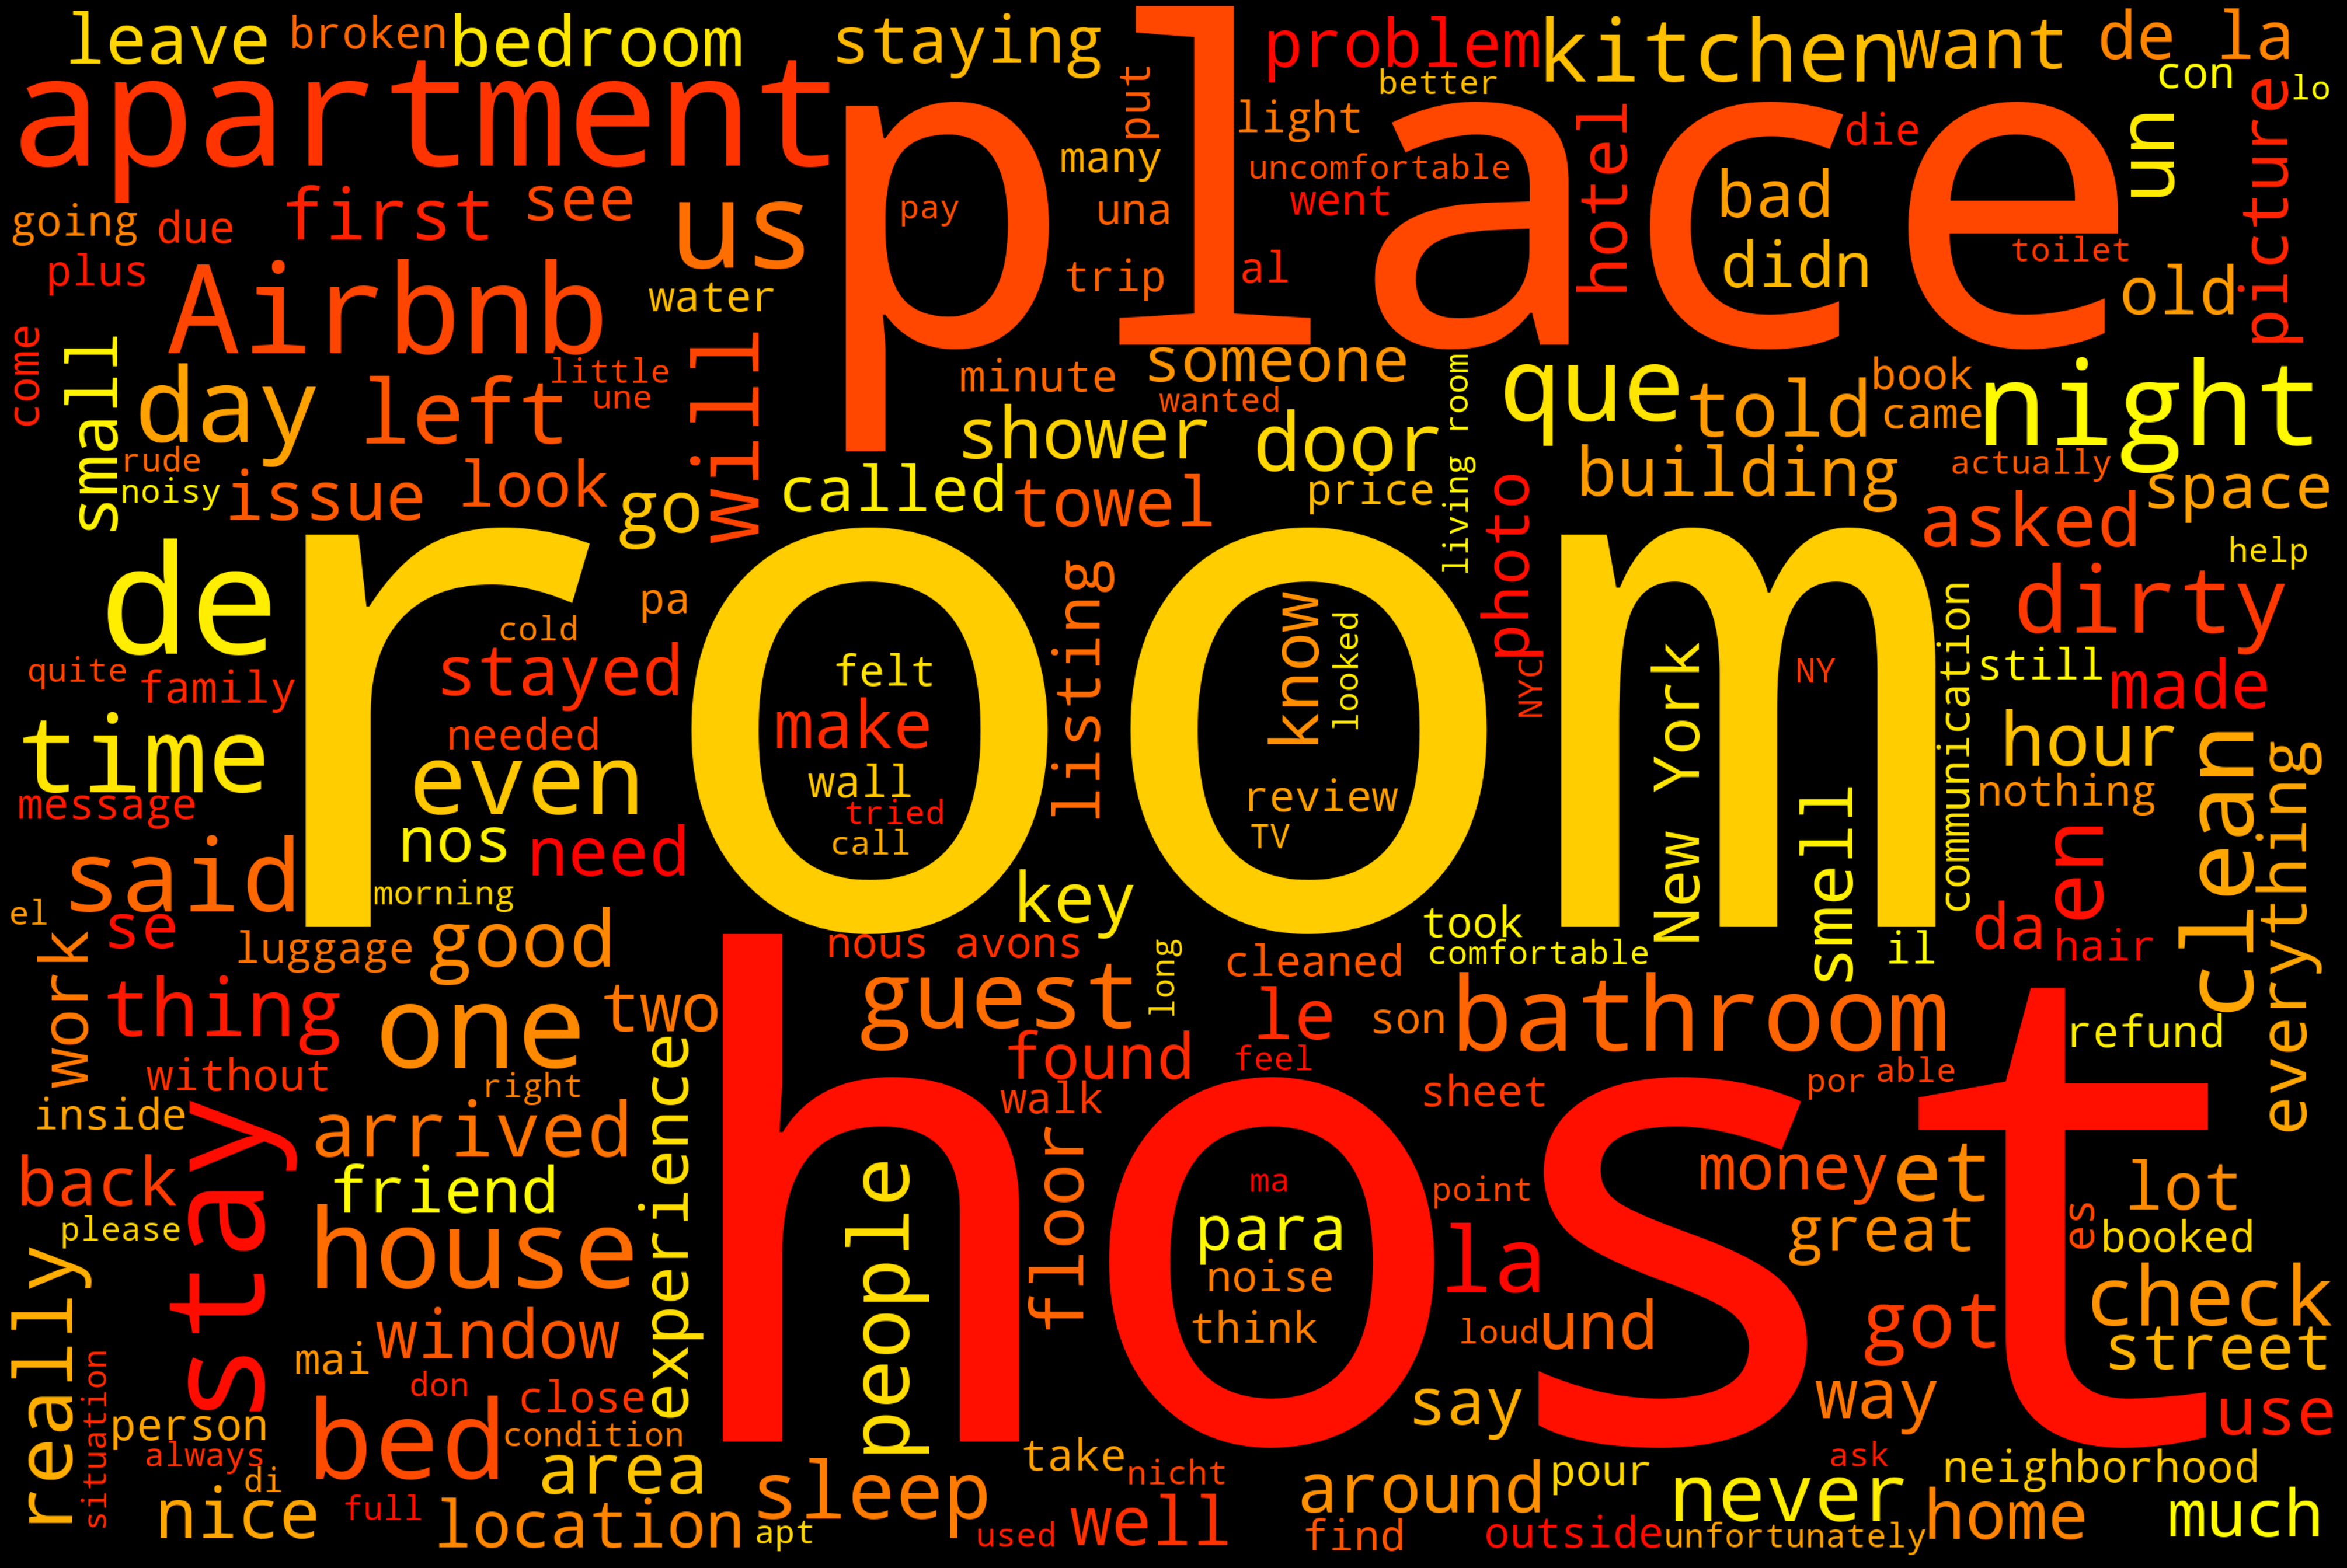

In [109]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [110]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap='summer',
    background_color = 'black',
    stopwords = STOPWORDS).generate(good_reviews_text)

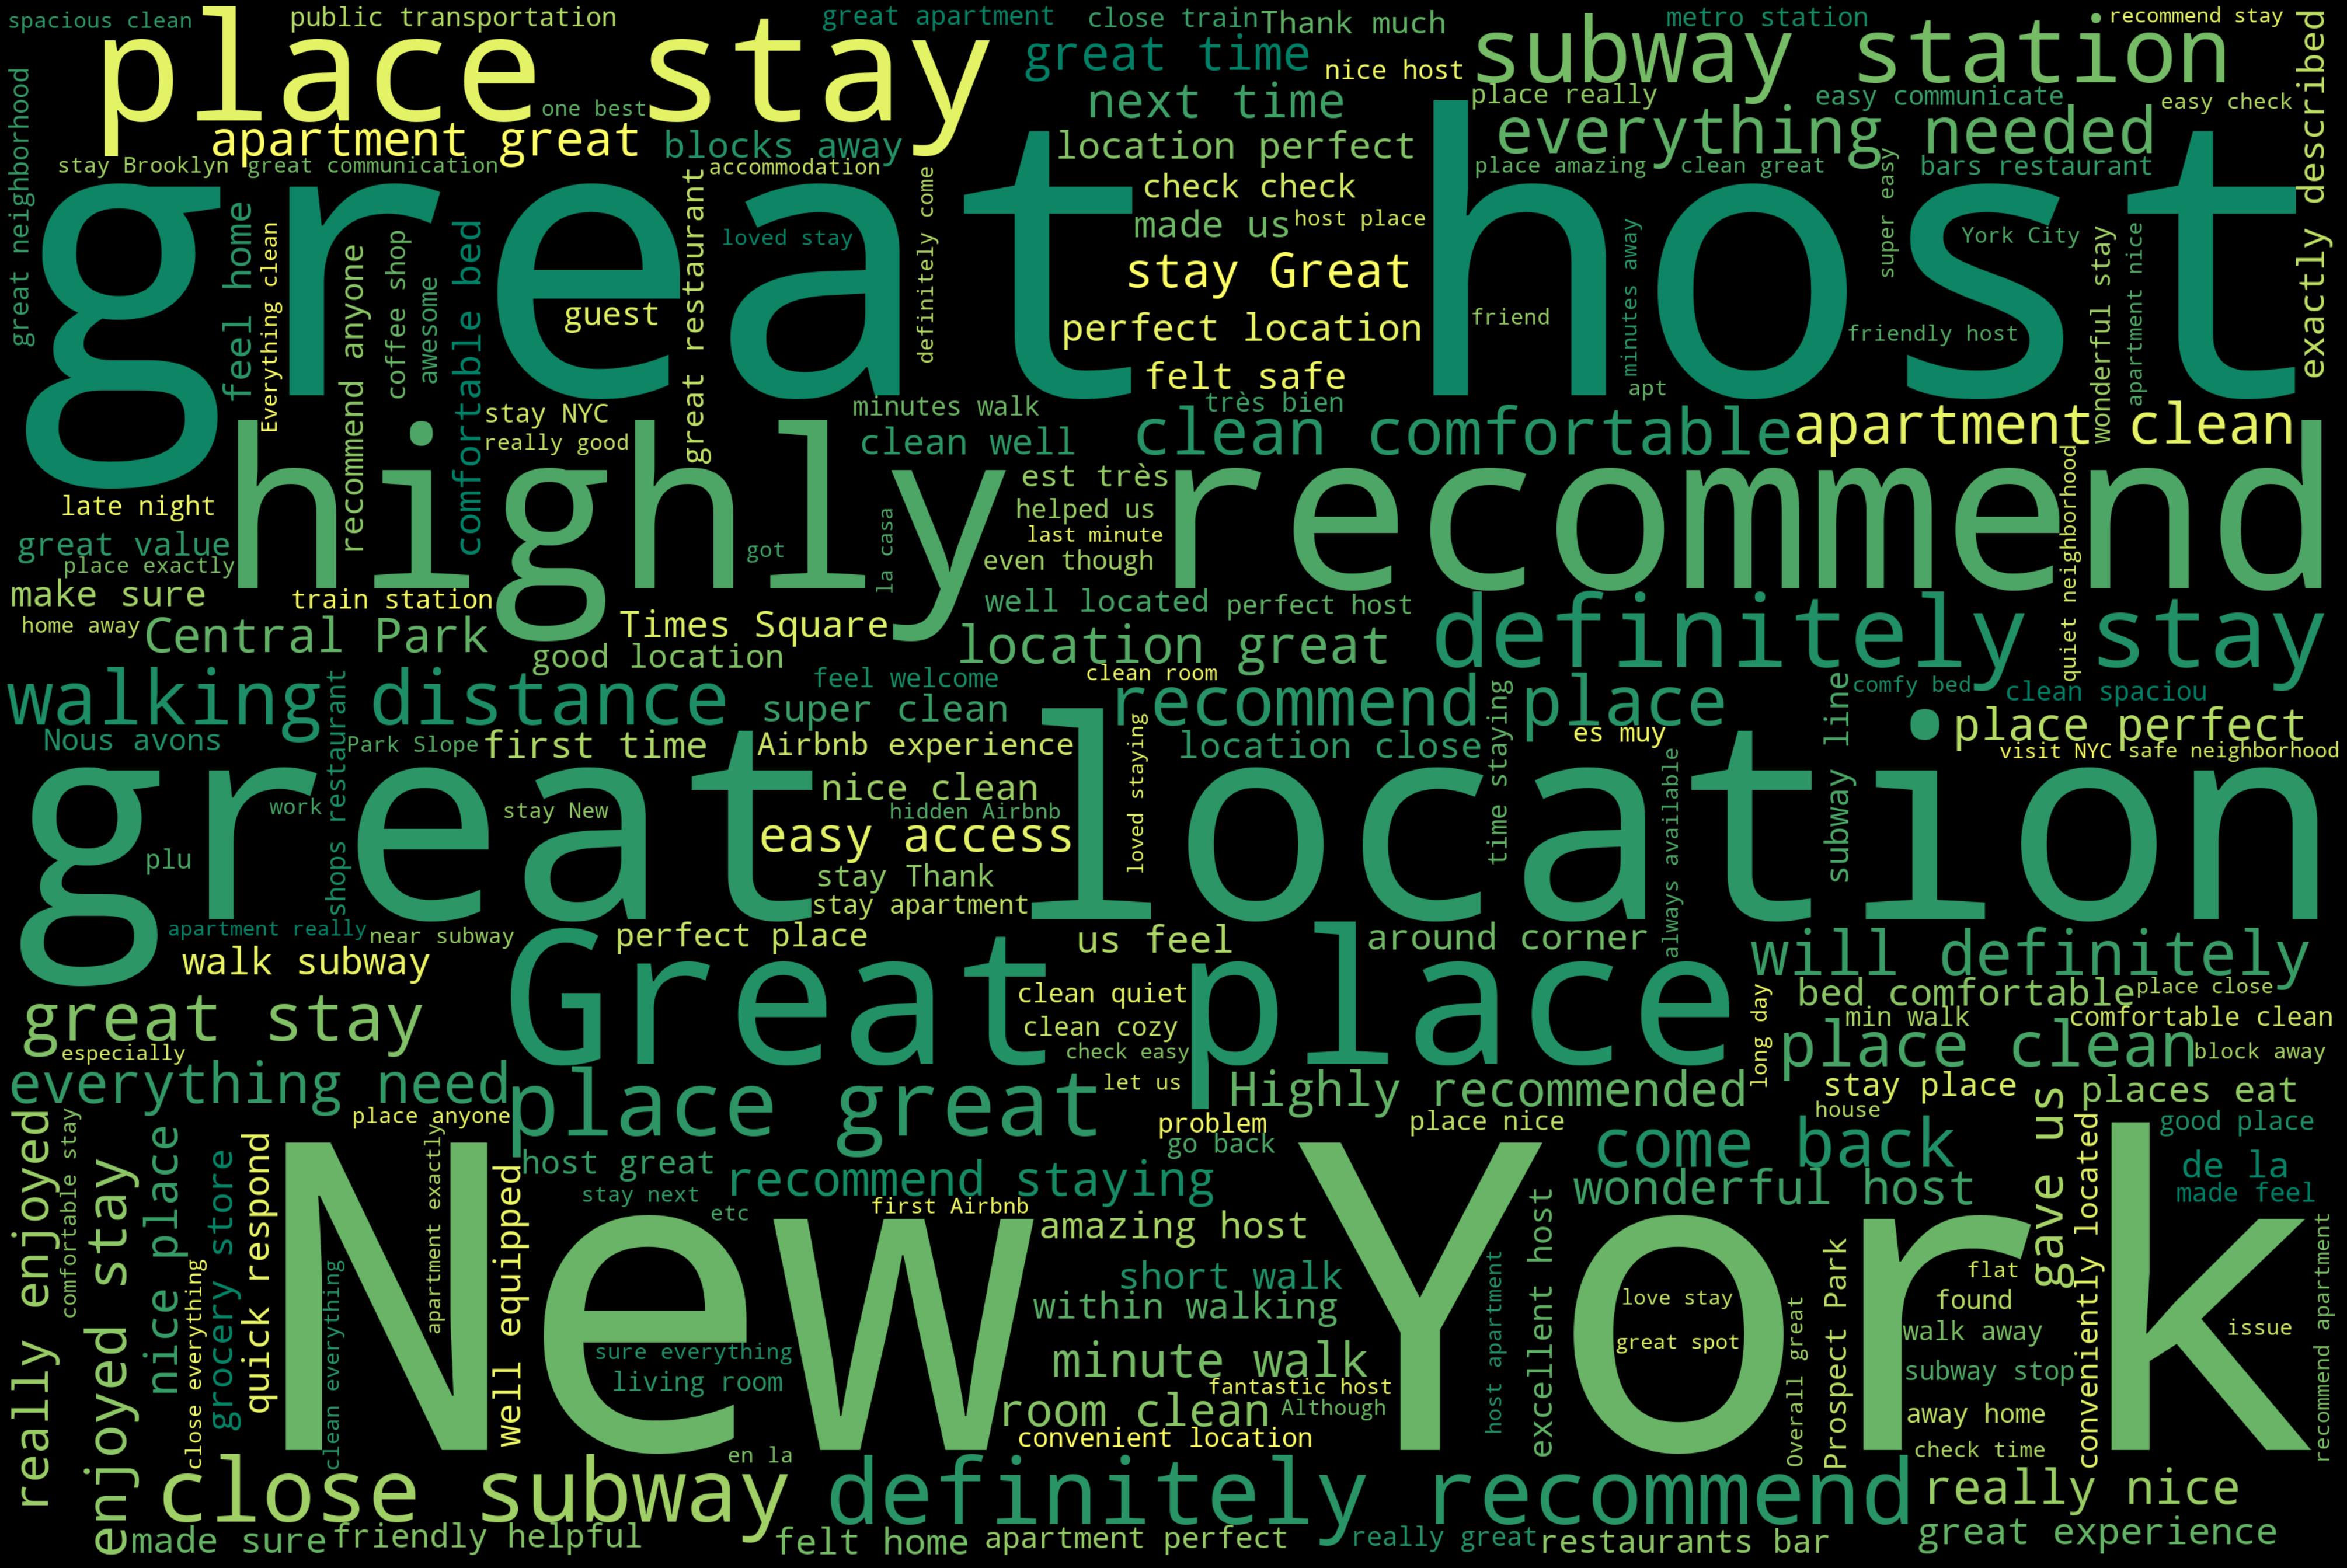

In [111]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()